<a href="https://colab.research.google.com/github/Harshithapc99/Point-cloud/blob/main/Point_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.2/687.2 kB 12.9 MB/s eta 0:00:00


In [ ]:
import os
import glob
import trimesh
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to your dataset in Google Drive
path ='/content/drive/MyDrive/mathtechproject/modelnetproject'

In [ ]:
airplane_train = trimesh.load(os.path.join(path, '/content/drive/MyDrive/mathtechproject/modelnetproject/table/train/table_0001.off'))
airplane_train.show()

In [ ]:
airplane_test = trimesh.load(os.path.join(path, "/content/drive/MyDrive/mathtechproject/modelnetproject/airplane/test/airplane_0627.off"))
airplane_test.show()

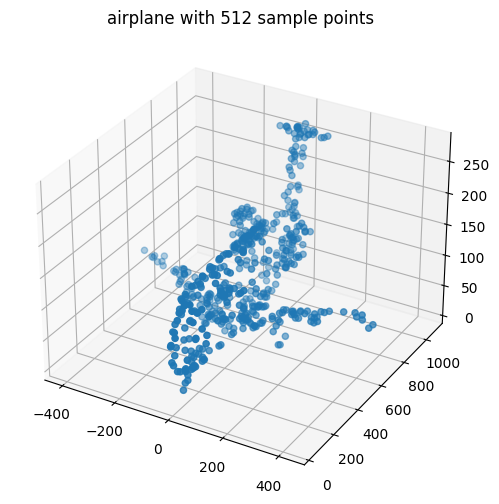

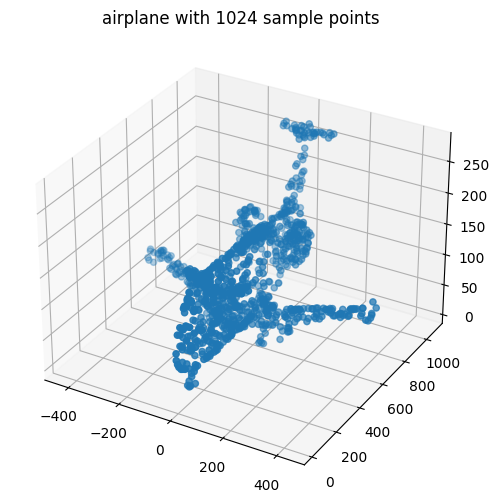

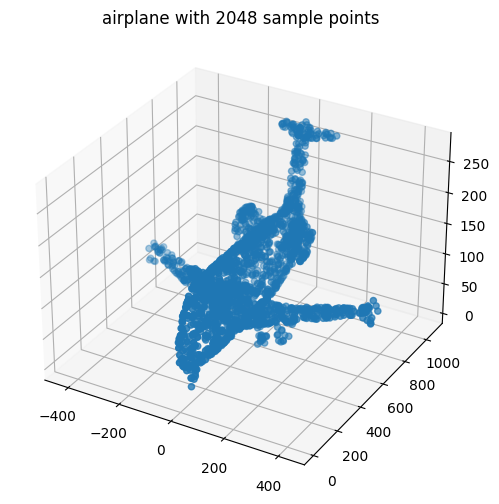

In [ ]:
points = airplane_test.sample(512)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_title("airplane with 512 sample points")
plt.show()

points = airplane_test.sample(1024)

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_title("airplane with 1024 sample points")
plt.show()

points = airplane_test.sample(2048)

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_title("airplane with 2048 sample points")
plt.show()

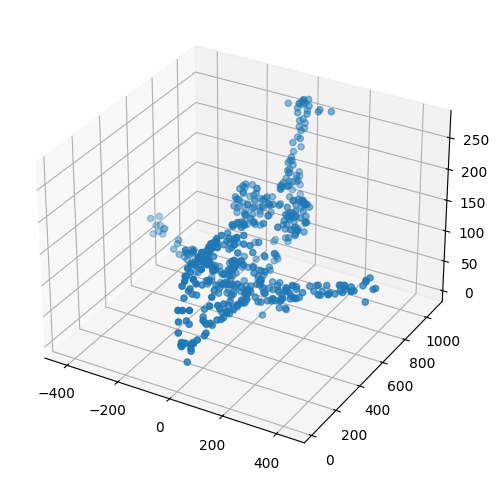

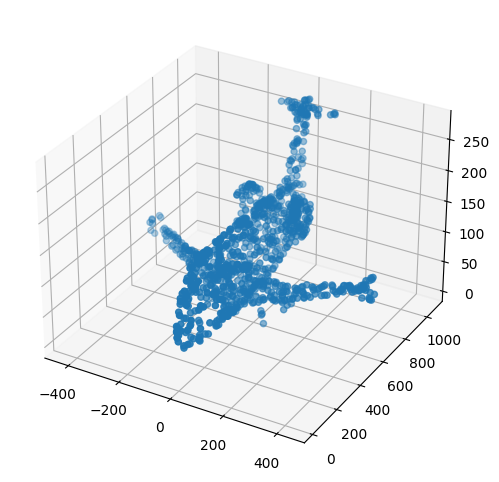

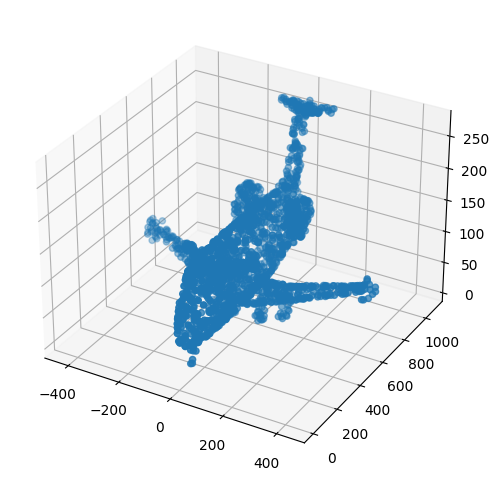

In [ ]:
points = airplane_test.sample(512)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
plt.show()

points = airplane_test.sample(1024)

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
plt.show()

points = airplane_test.sample(2048)

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
plt.show()

In [ ]:
train_points2048= []
test_points2048 = []



train_labels=[]
test_labels=[]

class_map={}


NUM_POINTS = 2048


folders = glob.glob(os.path.join(path, "[!README]*"))

for i, folder in enumerate(folders):
        print("processing class: {}".format(os.path.basename(folder)))
        # store folder name with ID so we can retrieve later
        class_map[i] = folder.split("/")[-1]
        # gather all files
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))

        for f in train_files:

            train_points2048.append(trimesh.load(f).sample(NUM_POINTS))

            train_labels.append(i)

        for f in test_files:

            test_points2048.append(trimesh.load(f).sample(NUM_POINTS))

            test_labels.append(i)

processing class: sofa


In [ ]:
import random
np.random.seed(5)

In [ ]:
import numpy as np
from sklearn.utils import shuffle

train_points=np.array(train_points2048)
test_points=np.array(test_points2048)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)
# shuffle the train points and labels
train_points, train_labels = shuffle(train_points, train_labels, random_state=42)

# shuffle the test points and labels
test_points, test_labels = shuffle(test_points, test_labels, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# flatten the train and test points
X_train = train_points.reshape(train_points.shape[0], -1)
X_test = test_points.reshape(test_points.shape[0], -1)

In [ ]:
X_train.shape

(5102, 6144)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# train the random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,train_labels)

# make predictions on the test set
y_pred = clf.predict(X_test)
y_pred1=clf.predict(X_train)
# calculate the accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

accuracy1 = accuracy_score(train_labels, y_pred1)
print("Accuracy1:", accuracy1)

Accuracy: 0.757
Accuracy1: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, y_pred)

In [ ]:
print(conf_mat)

[[93  1  0  0  0  1  0  0  5  0]
 [ 5 71  1  4  0  1  0  0  8 10]
 [ 1  0 88  1  0  0  1  0  0  9]
 [12  5  1 69  0  0  0  0  8  5]
 [ 0  0  0  0 61 29  0  1  0  9]
 [ 0  0  0  0  0 83  3  3  1 10]
 [ 0  0  0  0  0  3 90  2  3  2]
 [ 0  0  0  2  0  9 11 62 10  6]
 [29  0  1  0  0  1  4  1 61  3]
 [ 3  7  1  1  0  0  4  2  3 79]]


[Text(0, 0, 'sofa'),
 Text(0, 1, 'toilet'),
 Text(0, 2, 'table'),
 Text(0, 3, 'monitor'),
 Text(0, 4, 'mantel'),
 Text(0, 5, 'bookshelf'),
 Text(0, 6, 'airplane'),
 Text(0, 7, 'bottle'),
 Text(0, 8, 'bed'),
 Text(0, 9, 'chair')]

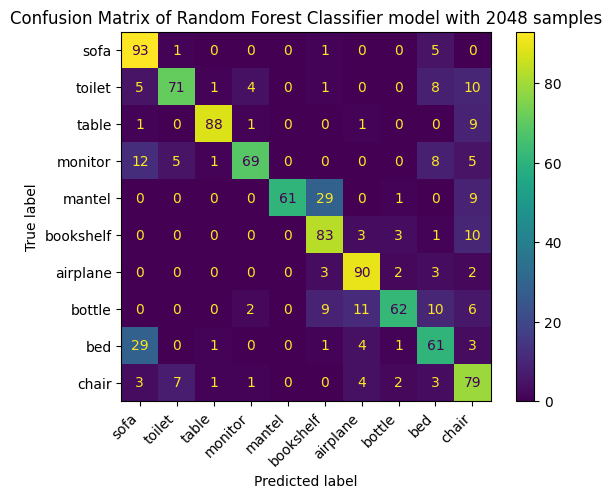

In [ ]:
from sklearn import metrics

display_labels = ['sofa','toilet','table','monitor','mantel','bookshelf','airplane','bottle','bed','chair']
fig, ax = plt.subplots()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['sofa','toilet','table','monitor','mantel','bookshelf','airplane','bottle','bed','chair'])

cm_display.plot(ax=ax)
ax.set_xticklabels(display_labels, rotation=45, ha='right', fontsize=10)
ax.set_title("Confusion Matrix of Random Forest Classifier model with 2048 samples")
ax.set_yticklabels(display_labels)

In [ ]:
# fig, ax = plt.subplots(figsize=(7.5, 7.5))
# ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
# for i in range(conf_mat.shape[0]):
#     for j in range(conf_mat.shape[1]):
#         ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center', size='large')
#         ax.set_xlabel("flat")

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

X_train1 = np.reshape(train_points, (train_points.shape[0], -1))
X_test1 = np.reshape(test_points, (test_points.shape[0], -1))
model= MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train1,train_labels)
ypred=model.predict(X_test1)
ypred1=model.predict(X_train1)

accuracy1 = accuracy_score(test_labels, ypred)
print("Accuracy1:", accuracy1)

accuracy = accuracy_score(train_labels, ypred1)
print("Accuracy:", accuracy)


Accuracy1: 0.226
Accuracy: 0.3230105840846727


In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, ypred)

[Text(0, 0, 'sofa'),
 Text(0, 1, 'toilet'),
 Text(0, 2, 'table'),
 Text(0, 3, 'monitor'),
 Text(0, 4, 'mantel'),
 Text(0, 5, 'bookshelf'),
 Text(0, 6, 'airplane'),
 Text(0, 7, 'bottle'),
 Text(0, 8, 'bed'),
 Text(0, 9, 'chair')]

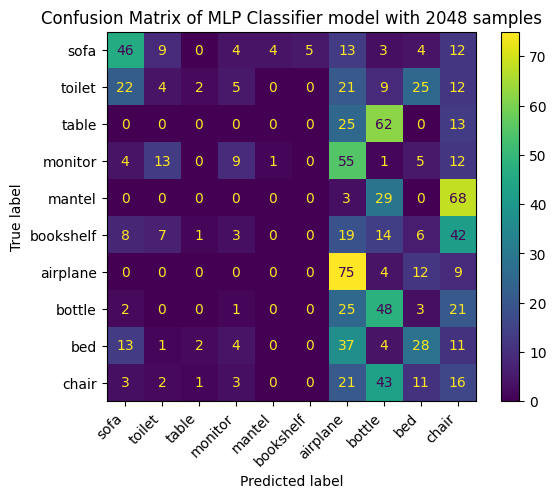

In [ ]:
from sklearn import metrics

display_labels = ['sofa','toilet','table','monitor','mantel','bookshelf','airplane','bottle','bed','chair']
fig, ax = plt.subplots()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['sofa','toilet','table','monitor','mantel','bookshelf','airplane','bottle','bed','chair'])

cm_display.plot(ax=ax)
ax.set_xticklabels(display_labels, rotation=45, ha='right', fontsize=10)
ax.set_title("Confusion Matrix of MLP Classifier model with 2048 samples")
ax.set_yticklabels(display_labels)

In [ ]:
import tensorflow as tf

# Example model architecture
model = tf.keras.Sequential()

# Reshape the input to match Conv2D requirements
model.add(tf.keras.layers.Reshape((2048, 3, 1), input_shape=(2048, 3)))

# Conv2D layers
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Conv2D layers
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))


# Conv2D layers
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), activation='relu', padding='same'))

# Global max pooling
model.add(tf.keras.layers.GlobalMaxPooling2D())

# Dense layers
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_points,train_labels, epochs=20, batch_size=32,validation_data=(test_points, test_labels))


Epoch 1/20
160/160 [==============================] - 26s 71ms/step - loss: 2.3612 - accuracy: 0.2450 - val_loss: 2.2155 - val_accuracy: 0.1700
Epoch 2/20
160/160 [==============================] - 10s 61ms/step - loss: 2.0018 - accuracy: 0.3428 - val_loss: 2.1495 - val_accuracy: 0.2610
Epoch 3/20
160/160 [==============================] - 10s 61ms/step - loss: 1.9355 - accuracy: 0.4351 - val_loss: 1.6006 - val_accuracy: 0.4310
Epoch 4/20
160/160 [==============================] - 10s 60ms/step - loss: 2.3152 - accuracy: 0.4096 - val_loss: 1.6636 - val_accuracy: 0.3740
Epoch 5/20
160/160 [==============================] - 10s 61ms/step - loss: 1.5618 - accuracy: 0.4835 - val_loss: 1.4156 - val_accuracy: 0.4990
Epoch 6/20
160/160 [==============================] - 10s 62ms/step - loss: 1.3483 - accuracy: 0.5459 - val_loss: 1.2856 - val_accuracy: 0.5110
Epoch 7/20
160/160 [==============================] - 10s 64ms/step - loss: 1.1049 - accuracy: 0.6254 - val_loss: 1.1918 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(test_points, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

32/32 [==============================] - 1s 21ms/step - loss: 0.7532 - accuracy: 0.7250
Test Loss: 0.7531702518463135
Test Accuracy: 0.7250000238418579


In [ ]:
ypred=np.argmax(model.predict(test_points), axis=1)

32/32 [==============================] - 1s 19ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, ypred)

In [ ]:
# fig, ax = plt.subplots(figsize=(7.5, 7.5))
# ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
# for i in range(conf_mat.shape[0]):
#     for j in range(conf_mat.shape[1]):
#         ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center', size='large')

[Text(0, 0, 'sofa'),
 Text(0, 1, 'toilet'),
 Text(0, 2, 'table'),
 Text(0, 3, 'monitor'),
 Text(0, 4, 'mantel'),
 Text(0, 5, 'bookshelf'),
 Text(0, 6, 'airplane'),
 Text(0, 7, 'bottle'),
 Text(0, 8, 'bed'),
 Text(0, 9, 'chair')]

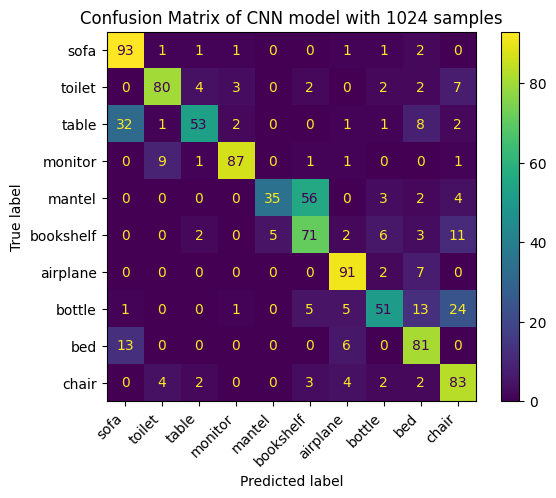

In [ ]:
from sklearn import metrics

display_labels = ['sofa','toilet','table','monitor','mantel','bookshelf','airplane','bottle','bed','chair']
fig, ax = plt.subplots()
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['sofa','toilet','table','monitor','mantel','bookshelf','airplane','bottle','bed','chair'])

cm_display.plot(ax=ax)
ax.set_xticklabels(display_labels, rotation=45, ha='right', fontsize=10)
ax.set_title("Confusion Matrix of CNN model with 1024 samples")
ax.set_yticklabels(display_labels)

In [ ]:
def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_dataset = tf.data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_points, test_labels))

train_dataset = train_dataset.shuffle(len(train_points)).map(augment).batch(32)
test_dataset = test_dataset.shuffle(len(test_points)).batch(32)

In [ ]:
def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


In [ ]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))

In [ ]:
def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [ ]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")


In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=30, validation_data=test_dataset)

Epoch 1/30
160/160 [==============================] - 41s 159ms/step - loss: 3.3372 - sparse_categorical_accuracy: 0.2860 - val_loss: 112040088841486336.0000 - val_sparse_categorical_accuracy: 0.2430
Epoch 2/30
160/160 [==============================] - 24s 153ms/step - loss: 3.0490 - sparse_categorical_accuracy: 0.3493 - val_loss: 3103524033978070024060928.0000 - val_sparse_categorical_accuracy: 0.2660
Epoch 3/30
160/160 [==============================] - 24s 151ms/step - loss: 2.8282 - sparse_categorical_accuracy: 0.4185 - val_loss: 24977849974784.0000 - val_sparse_categorical_accuracy: 0.3200
Epoch 4/30
160/160 [==============================] - 24s 151ms/step - loss: 2.7598 - sparse_categorical_accuracy: 0.4332 - val_loss: 1618768924249958645760.0000 - val_sparse_categorical_accuracy: 0.3990
Epoch 5/30
160/160 [==============================] - 24s 152ms/step - loss: 2.6168 - sparse_categorical_accuracy: 0.4761 - val_loss: 520497987584.0000 - val_sparse_categorical_accuracy: 0.4270

1/1 [==============================] - 1s 535ms/step


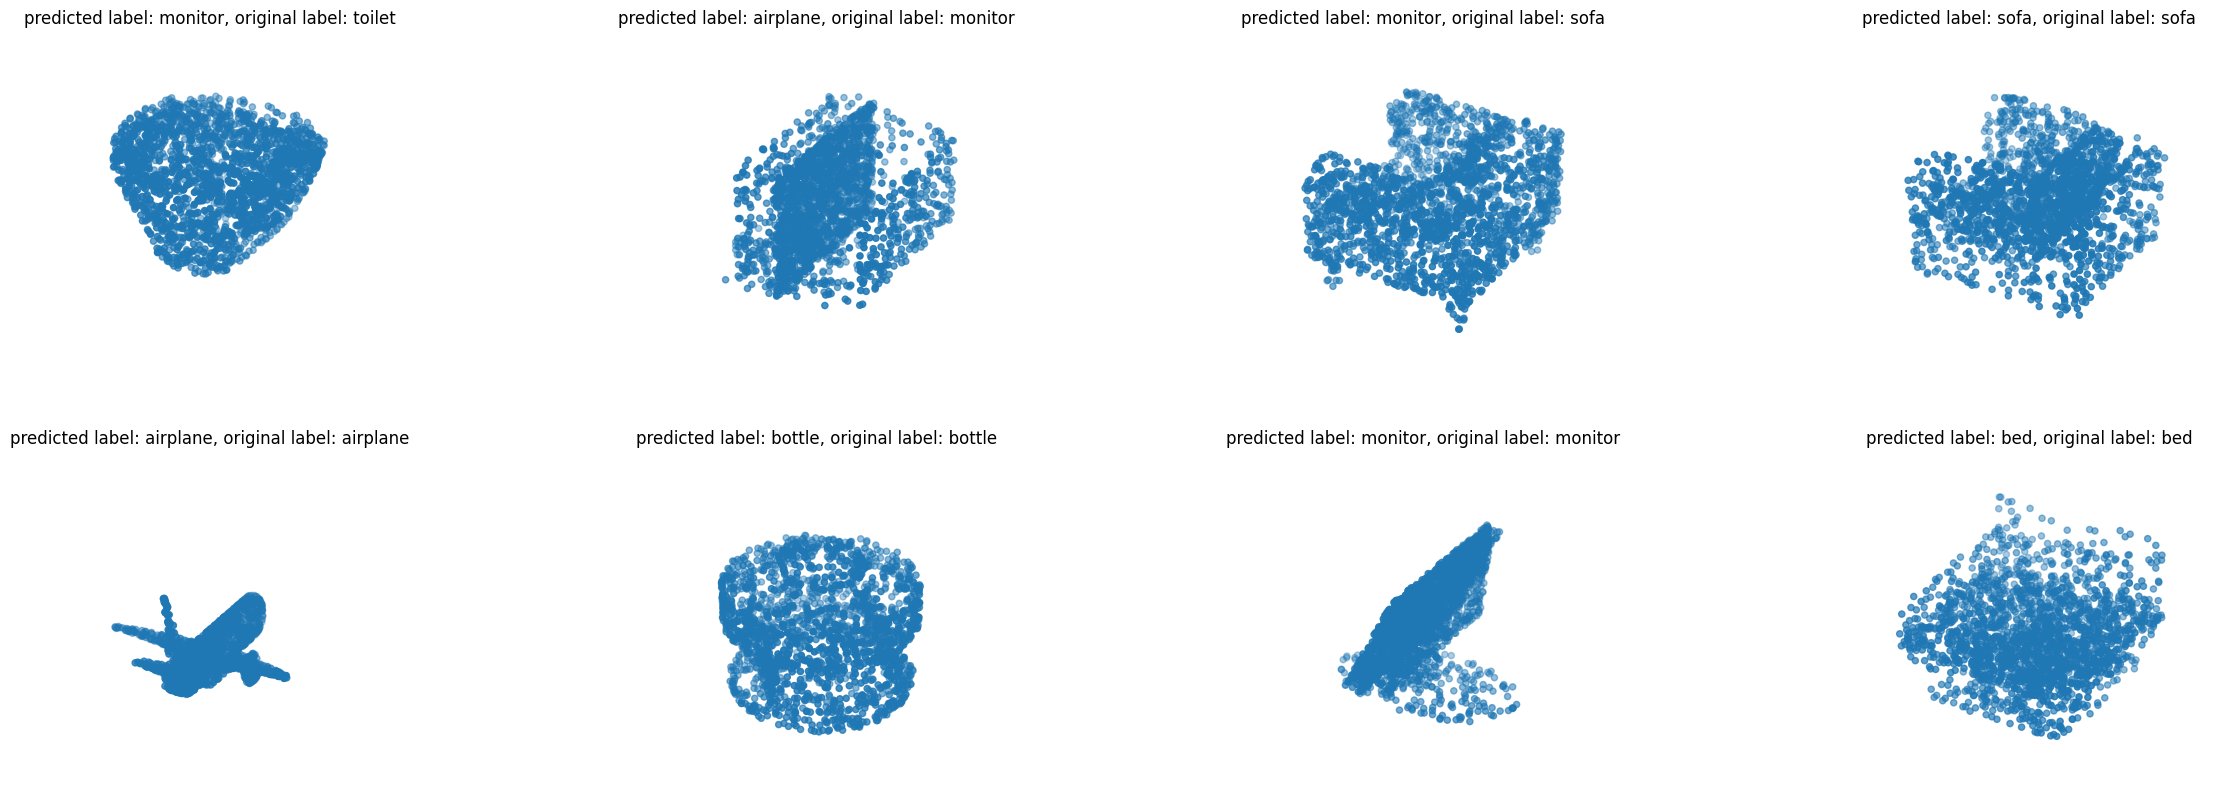

In [ ]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(30, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "predicted label: {:}, original label: {:}".format(
            class_map[preds[i].numpy()], class_map[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()